In [34]:
import pandas as pd
import matplotlib.pyplot as plt

FIGSIZE=(10,7)

In [5]:
data_dir = '../../Datasets/time-series/BTC_USD_2014-11-02_2021-11-28-CoinDesk.csv'

In [6]:
data_dir

'../../Datasets/time-series/BTC_USD_2014-11-02_2021-11-28-CoinDesk.csv'

In [7]:
btc_df = pd.read_csv(data_dir, 
                      parse_dates=['Date'],
                      index_col=['Date']
                     )

In [8]:
btc_df

,Currency,Closing Price (USD),24h Open (USD),24h High (USD),24h Low (USD)
Date,,,,,
2014-11-02,BTC,325.226330,338.010500,338.129500,319.367000
2014-11-03,BTC,331.600830,325.226330,333.759830,319.043500
2014-11-04,BTC,324.718330,331.600830,332.751330,323.063330
2014-11-05,BTC,332.456660,324.718330,335.811660,320.933330
2014-11-06,BTC,336.585000,332.456660,341.490000,328.561660
...,...,...,...,...,...
2021-11-24,BTC,57653.986829,56293.333341,57873.204059,55464.375918
2021-11-25,BTC,57055.583345,57576.067806,57749.043487,55937.698118
2021-11-26,BTC,58890.528335,57170.934635,59438.479170,57115.396411


In [11]:
btc_prices = pd.DataFrame(btc_df['Closing Price (USD)']).rename(columns={'Closing Price (USD)': 'Price'})

In [12]:
btc_prices

,Price
Date,
2014-11-02,325.226330
2014-11-03,331.600830
2014-11-04,324.718330
2014-11-05,332.456660
2014-11-06,336.585000
...,...
2021-11-24,57653.986829
2021-11-25,57055.583345
2021-11-26,58890.528335


<AxesSubplot:xlabel='Date'>

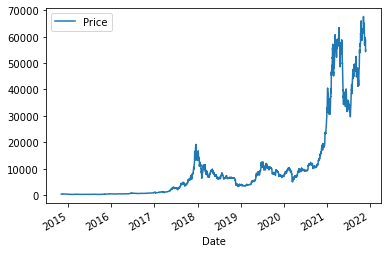

In [13]:
btc_prices.plot()

In [16]:
timesteps = btc_prices.index.to_numpy()
prices = btc_prices.Price.to_numpy()

timesteps[:10], prices[:10]

(array(['2014-11-02T00:00:00.000000000', '2014-11-03T00:00:00.000000000',
        '2014-11-04T00:00:00.000000000', '2014-11-05T00:00:00.000000000',
        '2014-11-06T00:00:00.000000000', '2014-11-07T00:00:00.000000000',
        '2014-11-08T00:00:00.000000000', '2014-11-09T00:00:00.000000000',
        '2014-11-10T00:00:00.000000000', '2014-11-11T00:00:00.000000000'],
       dtype='datetime64[ns]'),
 array([325.22633, 331.60083, 324.71833, 332.45666, 336.585  , 346.775  ,
        344.81166, 343.065  , 358.50166, 368.07666]))

In [22]:
# Splitting Train and Test data
split_size = int(0.8 * len(prices))

X_train, y_train = timesteps[:split_size], prices[:split_size]

X_test, y_test = timesteps[split_size:], prices[split_size:]

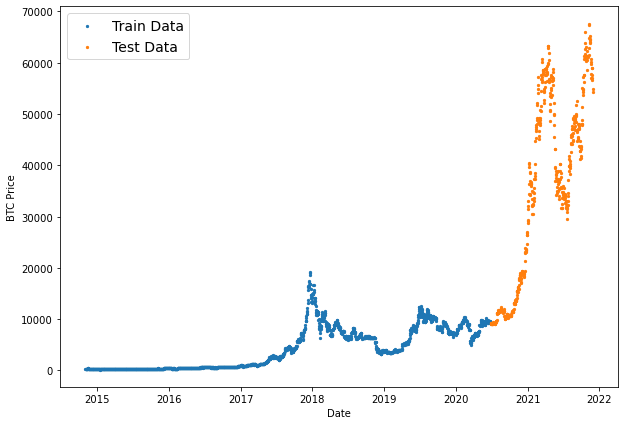

In [26]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=5, label='Train Data')
plt.scatter(X_test, y_test, s=5, label='Test Data')
plt.xlabel('Date')
plt.ylabel('BTC Price')
plt.legend(fontsize=14);

In [37]:
def plot_time_series(timesteps, values, format_='.', start=0, end=None, label=None):
    plt.plot(timesteps[start:end], values[start:end], format_, label=label)
    plt.xlabel('Time')
    plt.ylabel('BTC Price')
    plt.ylabel('BTC Price')
    if label:
        plt.legend(fontsize=14)
    plt.grid(True)

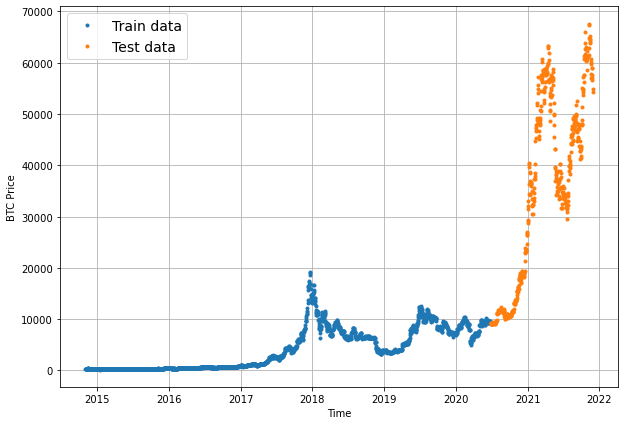

In [30]:
plt.figure(figsize=(10,7))
plot_time_series(timesteps=X_train, values=y_train, label="Train data")
plot_time_series(timesteps=X_test, values=y_test, label="Test data")

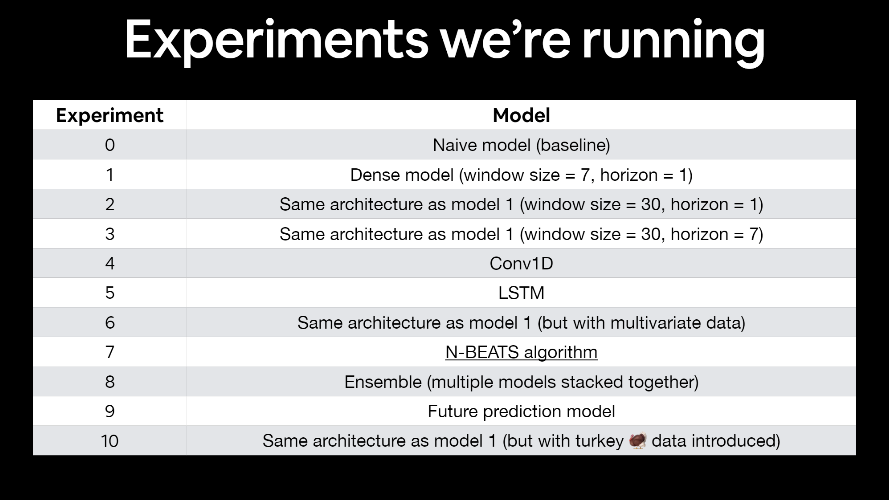

[MDBourke's Slides](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/slides/10_time_series_fundamentals_and_milestone_project_3_bitpredict.pdf)

In [55]:
### Offsetting

In [53]:
naive_forecast = y_test[:-1]
naive_forecast[:10], naive_forecast[-10:]

(array([9171.73208577, 9022.153768  , 9101.85005736, 9188.06137546,
        9148.44485856, 9236.31677043, 9097.79736639, 9094.32456102,
        9124.6535344 , 9055.46448252]),
 array([60049.92031656, 56936.51617026, 57896.16660268, 59756.02415132,
        59023.25979942, 56713.25806333, 57653.98682917, 57055.58334455,
        58890.52833524, 54304.1281953 ]))

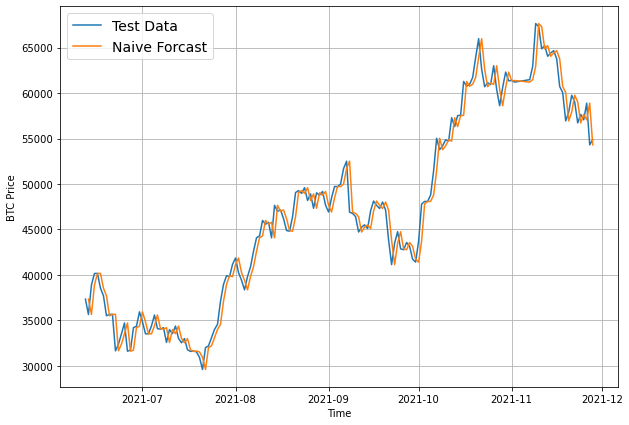

In [54]:
plt.figure(figsize=FIGSIZE)
plot_time_series(
    timesteps=X_test, 
    values=y_test, 
    start=350, 
    format_="-", 
    label='Test Data'
)
plot_time_series(
    timesteps=X_test[1:], 
    values=naive_forecast, 
    start=350,
    format_='-',
    label='Naive Forcast'
)

In [56]:
import tensorflow as tf

In [57]:
def mean_absolute_scaled_error(y_true, y_pred):
    mae = tf.reduce_mean(tf.abs(y_true-y_pred))
    
    mae_naive_no_season = tf.reduce_mean(tf.abs(y_true[1:] - y_true[:1]))
    
    return mae / mae_naive_no_season

In [59]:
mean_absolute_scaled_error(y_true = y_test[1:], y_pred = naive_forecast).numpy()

0.03836240615619712

In [60]:
def evaluate_preds(y_true, y_pred):
    y_true = tf.cast(y_true, dtype=tf.float32)
    y_pred = tf.cast(y_pred, dtype=tf.float32)
    
    mae = tf.keras.metrics.mean_absolute_error(y_true, y_pred)
    mse = tf.keras.metrics.mean_squared_error(y_true, y_pred)
    rmse = tf.sqrt(mse)
    mape = tf.keras.metrics.mean_absolute_percentage_error(y_true, y_pred)
    mase = mean_absolute_scaled_error(y_true, y_pred)
    
    return {
        'mae': mae.numpy(),
        'mse': mse.numpy(),
        'rmse' : rmse.numpy(),
        'mape' : mape.numpy(),
        'mase' : mase.numpy()
    }

In [61]:
naive_results = evaluate_preds(y_true=y_test[1:],
                               y_pred=naive_forecast)

naive_results

{'mae': 990.88385,
 'mse': 2236128.0,
 'rmse': 1495.3688,
 'mape': 2.6530569,
 'mase': 0.038362402}

### Formatting Data Part 2 : Windowing our Dataset

In [68]:
import numpy as np

In [63]:
HORIZON = 1
WINDOW_SIZE = 7

def get_labelled_windows(x, horizon=HORIZON):
    return x[:, :-horizon], x[:, -horizon:]

In [64]:
test_window, test_label = get_labelled_windows(tf.expand_dims(tf.range(8), axis=0))
print(f'Window: {tf.squeeze(test_window.numpy())} -> Label : {tf.squeeze(test_label).numpy()}')

Window: [0 1 2 3 4 5 6] -> Label : 7


In [77]:
def make_windows(x, window_size=WINDOW_SIZE, horizon=HORIZON):
    
    window_step = np.expand_dims(np.arange(window_size+horizon), axis=0)
    
    window_indexes = window_step + np.expand_dims(np.arange(len(x)-(window_size+horizon-1)), axis=0).T
    
    windowed_array = x[window_indexes]
    
    windows, labels = get_labelled_windows(windowed_array, horizon=horizon)
    return windows, labels

In [78]:
full_windows, full_labels = make_windows(prices, window_size=WINDOW_SIZE, horizon=HORIZON)
len(full_windows), len(full_labels)

(2573, 2573)

In [79]:
for i in range(3):
    print(full_windows[i], full_labels[i])

[325.22633 331.60083 324.71833 332.45666 336.585   346.775   344.81166] [343.065]
[331.60083 324.71833 332.45666 336.585   346.775   344.81166 343.065  ] [358.50166]
[324.71833 332.45666 336.585   346.775   344.81166 343.065   358.50166] [368.07666]


In [80]:
def make_train_test_splits(windows, labels, test_split=0.2):
    
    split_size=int(len(windows) * (1-test_split))
    train_windows = windows[:split_size]
    train_labels = labels[:split_size]
    test_windows = windows[split_size:]
    test_labels = labels[split_size:]
    
    return train_windows, test_windows, train_labels, test_labels

In [84]:
train_windows, test_windows, train_labels, test_labels = make_train_test_splits(full_windows, full_labels)

In [86]:
len(train_windows), len(test_windows), len(train_labels), len(test_labels)

(2058, 515, 2058, 515)

In [ ]:
import os